In [2]:
install.packages("tidyverse")
require(lubridate)
install.packages("anytime")
library(anytime)
library(ggplot2)
theme_set(theme_minimal())

Installing package into ‘/usr/local/spark-2.3.1-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)
Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Installing package into ‘/usr/local/spark-2.3.1-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)


In [3]:
# df <- read.csv("/home/jovyan/work/data/2010q1_filtered.csv")
df <- read.csv("/home/jovyan/work/data/tiny_filtered.csv")
df$datetime <- anytime::anytime(df$time)

In [4]:
head(df)
tail(df)
dim(df)

X,time,trainstation,train_type,train_count,total_delay,delay,name,lat,lon,⋯,max_windgust,max_precipitation1h,max_snowdepth,max_n,min_vis,min_clhb,max_precipitation3h,max_precipitation6h,flashcount,datetime
1287675,2010-01-01 00:00:00 UTC,HKH,L,1,0,11,Helsinki-Vantaan lentoasema,60.3267,24.95675,⋯,9,0,41,8,6110,1300,0,0,0,2010-01-01
1283303,2010-01-01 00:00:00 UTC,HKH,K,1,0,0,Helsinki-Vantaan lentoasema,60.3267,24.95675,⋯,9,0,41,8,6110,1300,0,0,0,2010-01-01
1284384,2010-01-01 00:00:00 UTC,HKH,L,2,0,1,Helsinki-Vantaan lentoasema,60.3267,24.95675,⋯,9,0,41,8,6110,1300,0,0,0,2010-01-01
1296206,2010-01-01 00:00:00 UTC,HKI,K,1,1,0,Kaisaniemi,60.1752,24.94459,⋯,9,0,26,8,3440,210,0,0,0,2010-01-01
1296264,2010-01-01 00:00:00 UTC,HKI,L,1,0,16,Kaisaniemi,60.1752,24.94459,⋯,9,0,26,8,3440,210,0,0,0,2010-01-01
1296340,2010-01-01 00:00:00 UTC,HKI,L,3,0,12,Kaisaniemi,60.1752,24.94459,⋯,9,0,26,8,3440,210,0,0,0,2010-01-01


,X,time,trainstation,train_type,train_count,total_delay,delay,name,lat,lon,⋯,max_windgust,max_precipitation1h,max_snowdepth,max_n,min_vis,min_clhb,max_precipitation3h,max_precipitation6h,flashcount,datetime
53407,65131,2010-01-09 23:00:00 UTC,VKS,L,2,0,0,Helsinki-Vantaan lentoasema,60.3267,24.95675,⋯,3,0,42,9,370,50,0,0,0,2010-01-09 23:00:00
53408,22635,2010-01-09 23:00:00 UTC,VMO,K,1,0,0,Kumpula,60.2031,24.96131,⋯,2,0,39,9,300,30,0,0,0,2010-01-09 23:00:00
53409,23969,2010-01-09 23:00:00 UTC,VMO,L,1,0,0,Kumpula,60.2031,24.96131,⋯,2,0,39,9,300,30,0,0,0,2010-01-09 23:00:00
53410,22966,2010-01-09 23:00:00 UTC,VMO,L,1,0,1,Kumpula,60.2031,24.96131,⋯,2,0,39,9,300,30,0,0,0,2010-01-09 23:00:00
53411,1321539,2010-01-09 23:00:00 UTC,VTI,K,2,0,48,Ruukki,64.6842,25.08919,⋯,2,0,27,-99,-99,-99,0,0,0,2010-01-09 23:00:00
53412,63995,2010-01-09 23:00:00 UTC,YLÖ,K,1,1,17,Tampere-Pirkkalan lentoasema,61.4184,23.61811,⋯,1,-99,-99,9,100,30,-99,-99,0,2010-01-09 23:00:00


[1] 53412    28

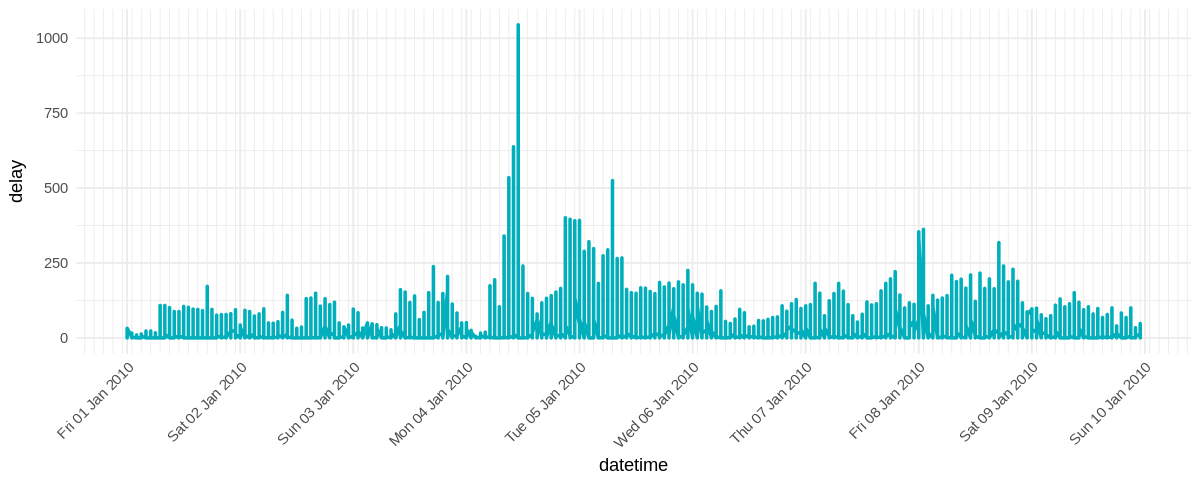

In [5]:
library(scales)
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = datetime, y = delay))+
  geom_line(color = "#00AFBB", size = 1) +
  scale_x_datetime(date_labels = "%a %d %b %Y", breaks = date_breaks("1 day"),
  minor_breaks = date_breaks("2 hour")) +
  theme(axis.text.x=element_text(angle=45, hjust=1))

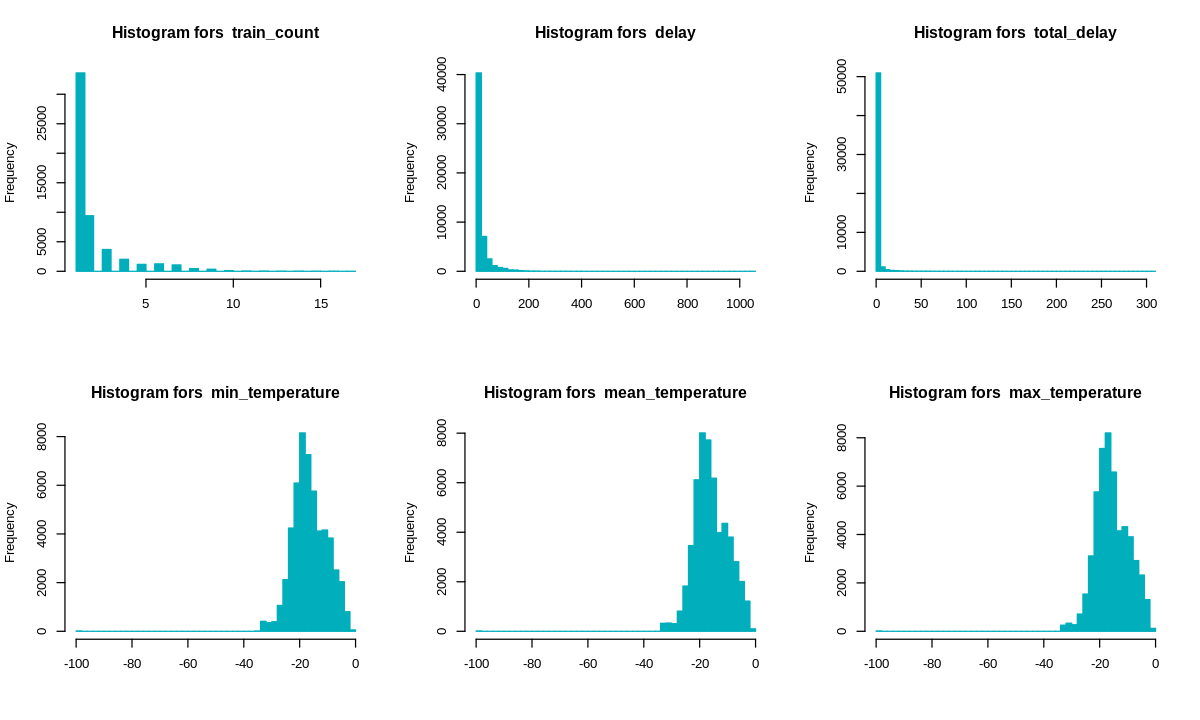

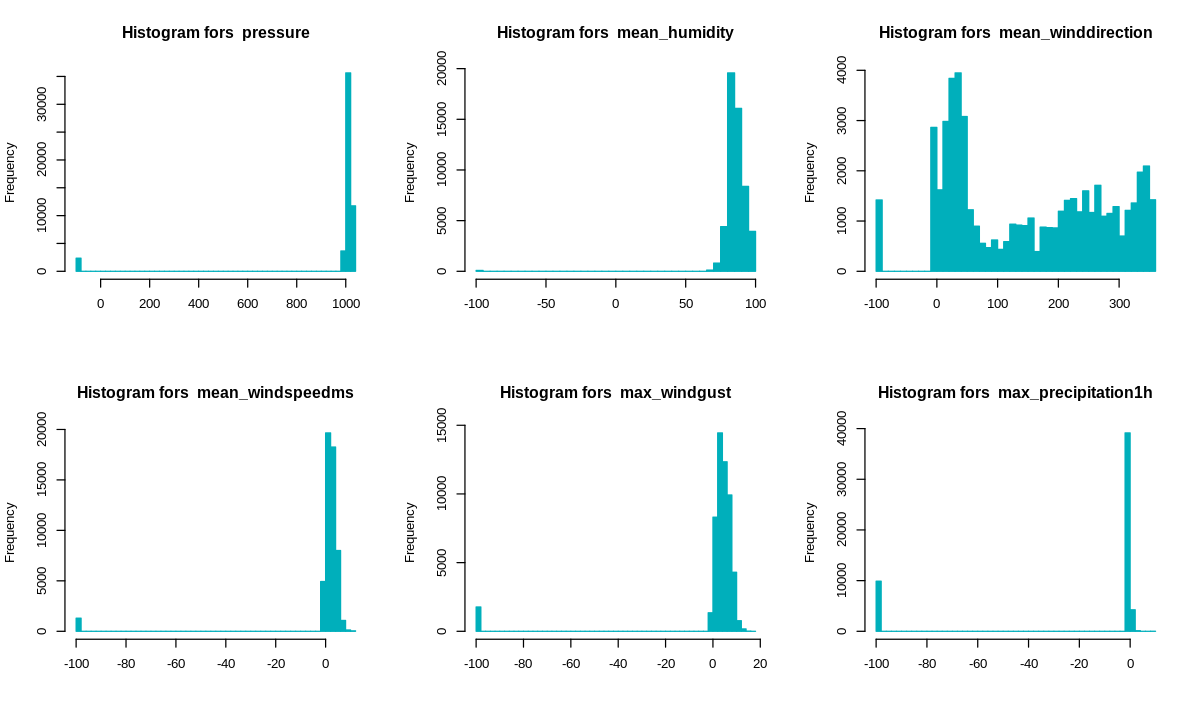

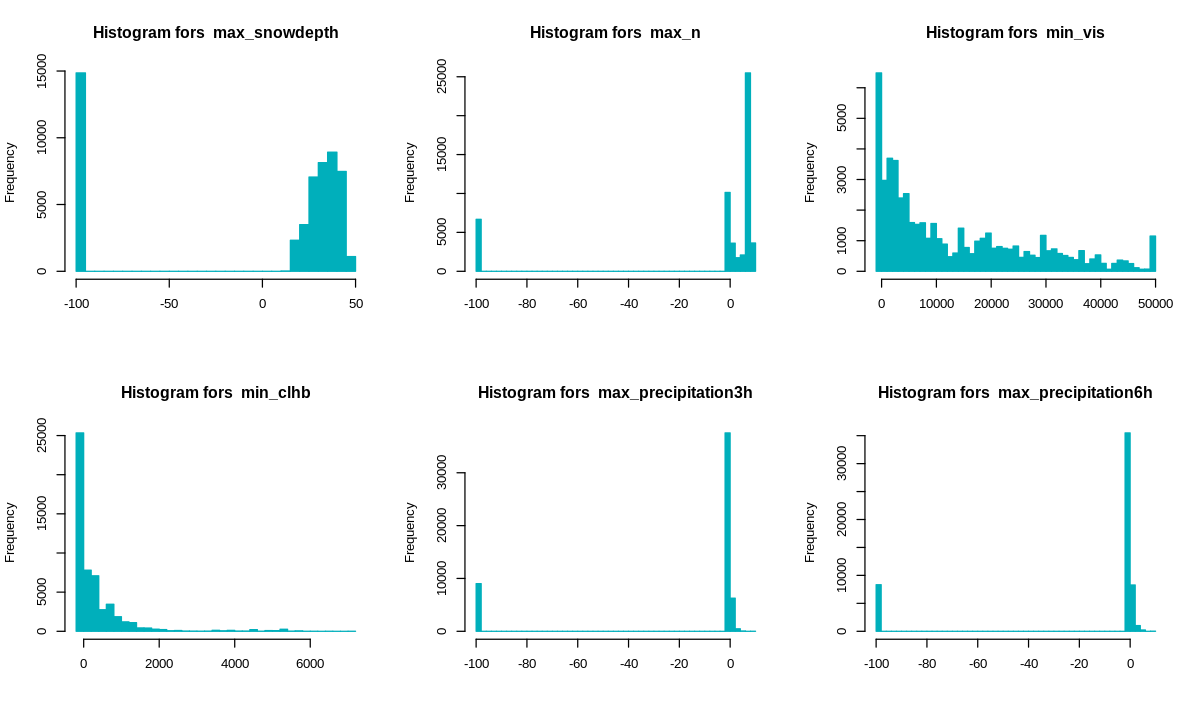

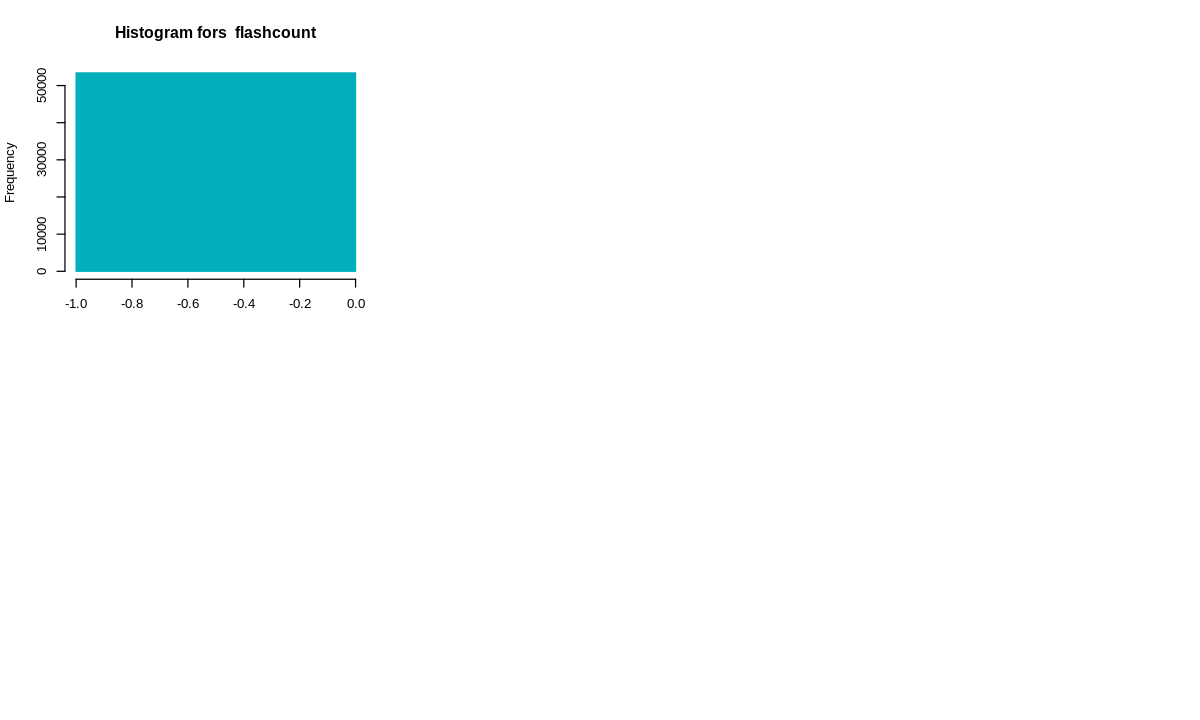

In [6]:
library(reshape2)
cols = c('train_count', 'delay', 'total_delay', 
         'min_temperature', 'mean_temperature', 
         'max_temperature', 'pressure', 'mean_humidity', 
         'mean_winddirection', 'mean_windspeedms', 'max_windgust', 
         'max_precipitation1h', 'max_snowdepth', 'max_n', 
         'min_vis', 'min_clhb', 'max_precipitation3h', 
         'max_precipitation6h', 'flashcount')
#ggplot(melt(df, id=cols), aes(x = value)) + 
#    facet_wrap(~ variable, scales = "free", ncol = 2) + 
#    geom_histogram(binwidth = .5)
par(mfrow=c(2,3))
options(repr.plot.width=10, repr.plot.height=6)
#subset(df, 'max_snowdepth'!=-99)
for (col in cols){
#    ggplot(df, aes(data)) + 
#      facet_wrap(~ col, scales = "free", ncol = 2) + 
#      geom_histogram(stat="count")
    hist(subset(df, col != -99)[,col],
         main=paste("Histogram fors ",col),
         xlab='', col='#00AFBB', border='#00AFBB',
         breaks=50)
}


Histograms for all rows where delay between stations have been over 5 minutes.

In [7]:
df_delay = df[df$delay > 5,]

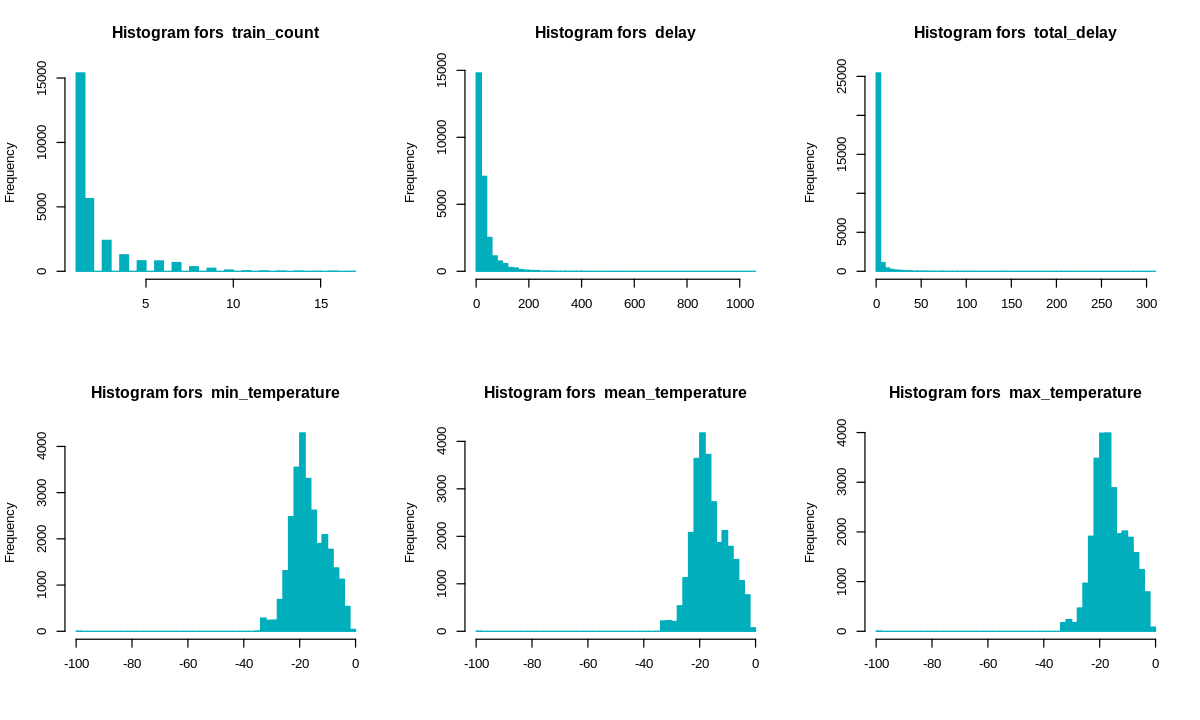

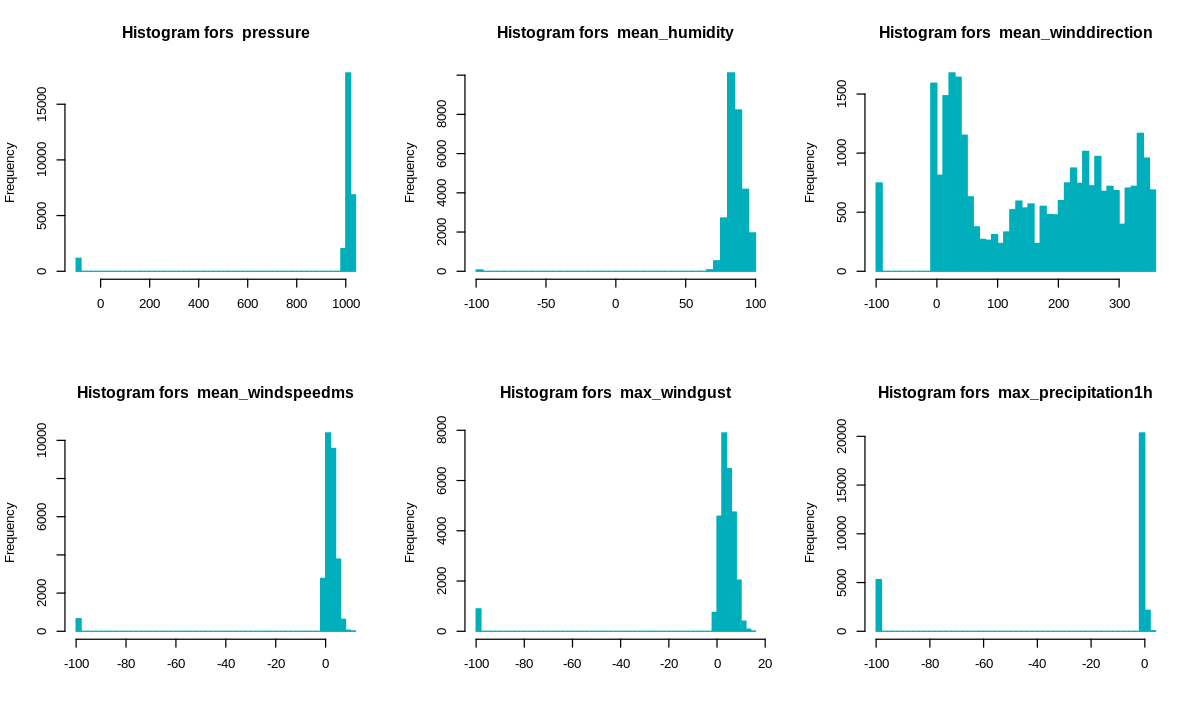

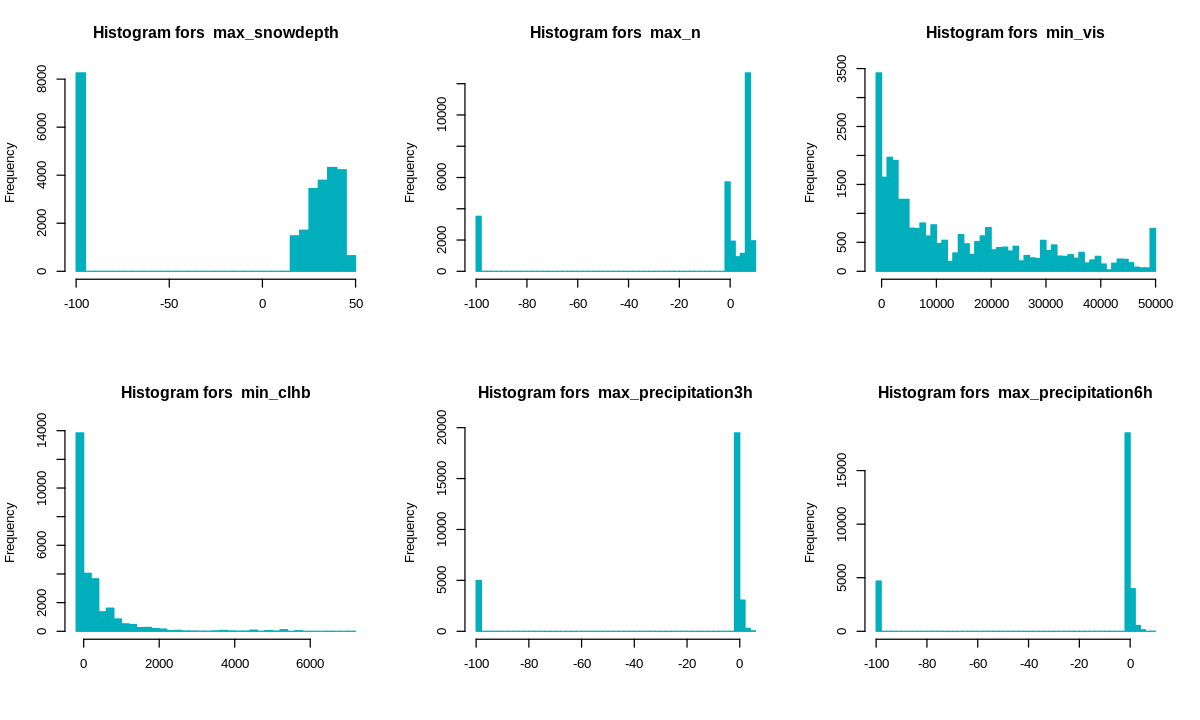

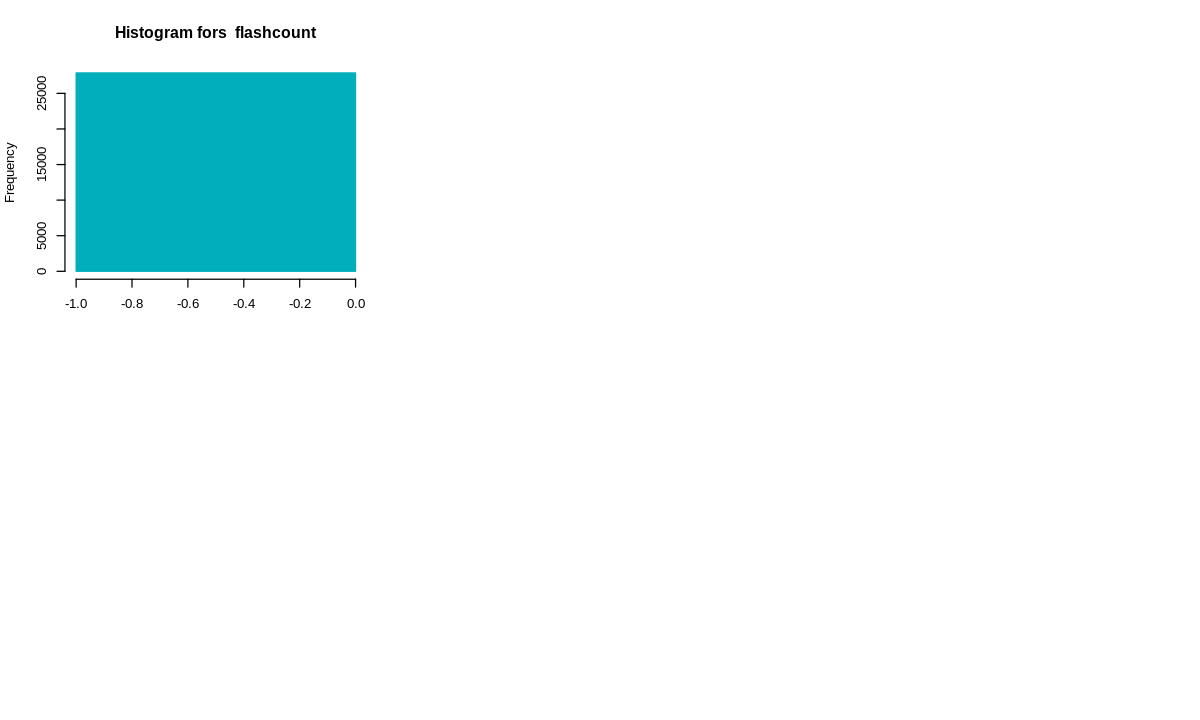

In [8]:
par(mfrow=c(2,3))
for (col in cols){
    hist(subset(df_delay, col != -99)[,col],
         main=paste("Histogram fors ",col),
         xlab='', col='#00AFBB', border='#00AFBB',
         breaks=50)
}